# Extracting a colour key

This notebook extracts the colours from a legend-like image. The easiest image to work with simply has the coloured blocks stacked up in a single column, with no gaps and no other colours (including no lines between the coloured blocks). 

Rather than hacking away with indices in Python, it might be easiesr to make a PNG that meets those criteria. You do want a PNG, not a JPEG or any other format, and you want to make sure it has lots of pixels, so that the boundaries are nice and sharp. 

Here's the image I'm starting off with, and what I'm transforming it to in Inkscape: 

<img style="float:left;" src="data/z_Lithology_legend.png" width="180px" />
<img src="data/z_Lithology_legend_gapless.png" width="45px" />

Import some basic stuff:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

Read the file and transform into a `numpy` array.

In [2]:
filename = "z_Lithology_legend_gapless.png"
im = np.array(Image.open("data/" + filename))
im.shape

(8431, 467, 3)

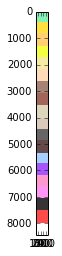

In [3]:
plt.imshow(im)
plt.show()

## Extract some pixels

Let's extract a column of pixels to work with. We know that they are all the same, all the way across. 

In [4]:
column = im.shape[1]/10.

We'll extract the red, green, and blue channels:

In [5]:
r = im[:,column,0]  # 100th column, red channel

In [6]:
r

array([134, 134, 134, ..., 255, 255, 255], dtype=uint8)

In [7]:
g = im[:,column,1]  # 100th column, green channel
b = im[:,column,2]  # 100th column, blue channel

## Find the edges

An easy way to find edges on the 3 channels simultaneously is to create an entity that is guaranteed to be different for any (r,g,b) triple. One way to do this is to make a hexadecimal string (as we might use in CSS or JavaScript coding, for example). 

In [8]:
import utils

In [9]:
guaranteed = [utils.rgb_to_hex(i) for i in im[:, column, :3]]

In [10]:
guaranteed = np.array(guaranteed)
guaranteed[:3]

array(['86F0B6', '86F0B6', '86F0B6'], 
      dtype='|S6')

We'll make a temporary truth table to show where our values change. 

In [11]:
g = guaranteed[1:] == guaranteed[:-1]
g

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

But the values change 1-3 times for each boundary, depending on the pixels values. So we'll get the edges from the first downwards change from `True`.  

In [12]:
edges = g[1:] & (g[:-1]==0)

These are the indices at which the lithology changes. Let's make their indices into the 'tops'... we'll transform them to depth later. 

In [13]:
tops = np.where(edges)[0]+1
tops = np.append(0,tops)

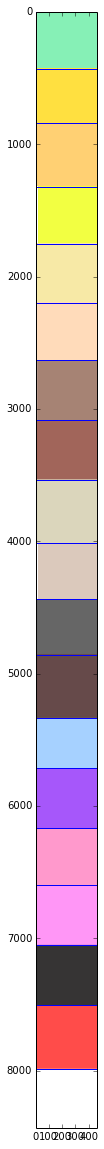

In [14]:
plt.figure(figsize=(4,20))
for t in tops: plt.axhline(t)
plt.imshow(im)
plt.show()

## Grab the colours

Just to be certain of hitting 'clean' intervals for the colour samples, we'll get them from a few pixels down.

In [15]:
pix = tops+10
pix

array([  10,  439,  853, 1332, 1760, 2207, 2643, 3096, 3546, 4025, 4449,
       4865, 5344, 5724, 6175, 6607, 7057, 7515, 7993])

Make a list of the colours, with a little sidestep in case of duplicates. 

In [16]:
hexes = []
for i in im[pix,column,:3].tolist():
    h = utils.rgb_to_hex(i)
    if h in hexes:
        hexes.remove(h) # Eject the previous one.
    hexes.append(h) # Keep the last instance.
hexes

['86F0B6',
 'FFE040',
 'FFD073',
 'F2FF42',
 'F7E9A6',
 'FFDBBA',
 'A68374',
 'A1655A',
 'DBD6BC',
 'DBC9BC',
 '666666',
 '664A4A',
 'A6D1FF',
 'A657FA',
 'FF99CC',
 'FF96F6',
 '363434',
 'FF4C4A',
 'FFFFFF']

Put it all together.

This is all copied verbatim from the legend. 

In [17]:
rock_groups={
'Sedimentary':{
  'Clastic': ['Conglomerate', 'Sandstone', 'Siltstone', 'Heterolithic', 'Mudstone', 'Coal',],
  'Carbonate': ['Limestone', 'Dolomite',], 
  'Evaporite': ['Anhydrite', 'Halite', 'Gypsum', 'Sylvite',],
  },
'Igneous': ['Volcanic', 'Granite', 'Basalt', 'Diorite'],
}

lith_lithologies = [
'Conglomerate', 
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Siltstone',
'Siltstone',
'Heterolithic',
'Heterolithic',
'Mudstone',
'Mudstone',
'Limestone',
'Dolomite',
'Anhydrite',
'Halite',
'Coal',
'Volcanic',
'NULL',
]

lith_colours = [
None, 
'Grey',
'Red',
'Grey',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
None, 
None, 
None, 
None, 
None, 
None, 
None, 
]

lith_grainsize = [
None, 
'C-M',
'C-M',
'F-M',
'VF-F',
'VF-F',
None,
None,
None, 
None, 
None, 
None, 
None, 
None, 
None, 
None, 
None, 
None, 
None, 
]

In [18]:
import pprint

In [56]:
legend = {}
for i, colour in enumerate(hexes):
    this_lith = {
                 'lithology': lith_lithologies[i],
                 'colour': lith_colours[i],
                 'grainsize': lith_grainsize[i],
                 'map colour': colour,
                 'code': i+1
                 }
    legend[colour] = this_lith
    
pprint.pprint(legend)

{'363434': {'code': 17,
            'colour': None,
            'grainsize': None,
            'lithology': 'Coal',
            'map colour': '363434'},
 '664A4A': {'code': 12,
            'colour': 'Red',
            'grainsize': None,
            'lithology': 'Mudstone',
            'map colour': '664A4A'},
 '666666': {'code': 11,
            'colour': 'Grey',
            'grainsize': None,
            'lithology': 'Mudstone',
            'map colour': '666666'},
 '86F0B6': {'code': 1,
            'colour': None,
            'grainsize': None,
            'lithology': 'Conglomerate',
            'map colour': '86F0B6'},
 'A1655A': {'code': 8,
            'colour': 'Red',
            'grainsize': None,
            'lithology': 'Siltstone',
            'map colour': 'A1655A'},
 'A657FA': {'code': 14,
            'colour': None,
            'grainsize': None,
            'lithology': 'Dolomite',
            'map colour': 'A657FA'},
 'A68374': {'code': 7,
            'colour': 'Grey',
  

In [57]:
for code in legend:
    
    summary = legend[code]['lithology']
    
    if legend[code]['grainsize']:
        summary += ', ' + legend[code]['grainsize']
        
    if legend[code]['colour']:
        summary += ', ' + legend[code]['colour']
        
    legend[code]['summary'] = summary
    
pprint.pprint(legend)

{'363434': {'code': 17,
            'colour': None,
            'grainsize': None,
            'lithology': 'Coal',
            'map colour': '363434',
            'summary': 'Coal'},
 '664A4A': {'code': 12,
            'colour': 'Red',
            'grainsize': None,
            'lithology': 'Mudstone',
            'map colour': '664A4A',
            'summary': 'Mudstone, Red'},
 '666666': {'code': 11,
            'colour': 'Grey',
            'grainsize': None,
            'lithology': 'Mudstone',
            'map colour': '666666',
            'summary': 'Mudstone, Grey'},
 '86F0B6': {'code': 1,
            'colour': None,
            'grainsize': None,
            'lithology': 'Conglomerate',
            'map colour': '86F0B6',
            'summary': 'Conglomerate'},
 'A1655A': {'code': 8,
            'colour': 'Red',
            'grainsize': None,
            'lithology': 'Siltstone',
            'map colour': 'A1655A',
            'summary': 'Siltstone, Red'},
 'A657FA': {'code': 

In [58]:
def summarize(rock):
    summary = rock['lithology']
    if rock['grainsize']:
        summary += ', ' + rock['grainsize'] 
    if rock['colour']:
        summary += ', ' + rock['colour'] 
    return summary

Check integers against imported image:

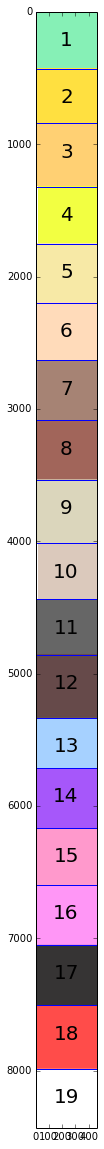

In [59]:
plt.figure(figsize=(4,20))
for i, t in enumerate(tops):
    plt.axhline(t)
    plt.text(im.shape[1]/2., t+((tops[1]-tops[0])/2.), i+1, fontsize=20, verticalalignment='center', horizontalalignment='center')
plt.imshow(im)
plt.show()

And check we can reproduce this:

In [60]:
import matplotlib

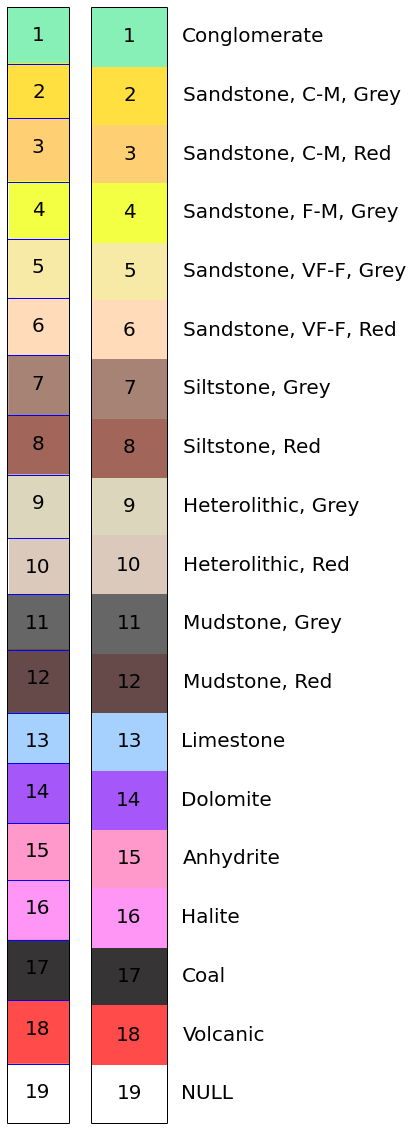

In [63]:
fig = plt.figure(figsize=(3,20))

ax1 = plt.subplot(121)
for i, t in enumerate(tops):
    ax1.axhline(t)
    ax1.text(im.shape[1]/2., t+((tops[1]-tops[0])/2.), i+1, fontsize=20, verticalalignment='center', horizontalalignment='center')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.imshow(im)

ax = plt.subplot(122)
for i,l in legend.iteritems():
    i = l['code'] # Quick hack as I've gone back to using hex codes
    rect1 = matplotlib.patches.Rectangle((0, 100*i), 100, 100, color='#'+l['map colour'])
    ax.add_patch(rect1)
    plt.text(50, (100*i)+50, i, fontsize=20, verticalalignment='center', horizontalalignment='center') 
    plt.text(120, (100*i)+50, summarize(l), fontsize=20, verticalalignment='center', horizontalalignment='left') 
plt.xlim([0, 100])
plt.ylim([100,2000])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.invert_yaxis()

plt.show()

The column on the left is the original image, with the codes superimposed. 

The one on the right is generated from the `legend` dictionary. 

In [65]:
legend

{'363434': {'code': 17,
  'colour': None,
  'grainsize': None,
  'lithology': 'Coal',
  'map colour': '363434',
  'summary': 'Coal'},
 '664A4A': {'code': 12,
  'colour': 'Red',
  'grainsize': None,
  'lithology': 'Mudstone',
  'map colour': '664A4A',
  'summary': 'Mudstone, Red'},
 '666666': {'code': 11,
  'colour': 'Grey',
  'grainsize': None,
  'lithology': 'Mudstone',
  'map colour': '666666',
  'summary': 'Mudstone, Grey'},
 '86F0B6': {'code': 1,
  'colour': None,
  'grainsize': None,
  'lithology': 'Conglomerate',
  'map colour': '86F0B6',
  'summary': 'Conglomerate'},
 'A1655A': {'code': 8,
  'colour': 'Red',
  'grainsize': None,
  'lithology': 'Siltstone',
  'map colour': 'A1655A',
  'summary': 'Siltstone, Red'},
 'A657FA': {'code': 14,
  'colour': None,
  'grainsize': None,
  'lithology': 'Dolomite',
  'map colour': 'A657FA',
  'summary': 'Dolomite'},
 'A68374': {'code': 7,
  'colour': 'Grey',
  'grainsize': None,
  'lithology': 'Siltstone',
  'map colour': 'A68374',
  'summary